# Imports

In [2]:
#install library
# !pip install lifelines

In [3]:
import pandas as pd
from lifelines import CoxPHFitter

# Load Dataset

In [4]:
dataset = pd.read_csv("./data/lung.csv")

# The model not trate with NaN data
dataset = dataset.dropna()
dataset.head()                                   

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,1,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,2,68,2,2.0,70.0,60.0,384.0,10.0
7,11.0,361,2,71,2,2.0,60.0,80.0,538.0,1.0


transforming dependent variable with binning `status` coluns

In [5]:
dataset.loc[dataset.status == 1, "status"] = 0
dataset.loc[dataset.status == 2, "status"] = 1
dataset.head(4)

,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,3.0,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,5.0,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,12.0,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,7.0,310,1,68,2,2.0,70.0,60.0,384.0,10.0


- remove instances variables
- In CPH we not include `inst`(instance) column, because the place of people is.

In [6]:
dataset = dataset.drop(columns = "inst")
dataset.head()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
1,455,1,68,1,0.0,90.0,90.0,1225.0,15.0
3,210,1,57,1,1.0,90.0,60.0,1150.0,11.0
5,1022,0,74,1,1.0,50.0,80.0,513.0,0.0
6,310,1,68,2,2.0,70.0,60.0,384.0,10.0
7,361,1,71,2,2.0,60.0,80.0,538.0,1.0


# Cox Proportional Hazard(CPH)

- Whe we instantiate the CPH object, it`s similiar to feed him with regression linear model;

In [7]:
model = CoxPHFitter()
model.fit(dataset, "time",
          event_col = "status")
model.print_summary()

/opt/homebrew/lib/python3.9/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CoxPHFitter: fitted with 167 total observations, 47 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 120
   partial log-likelihood = -494.03
         time fit was run = 2022-09-16 11:10:47 UTC

---
            coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                         
age         0.01       1.01       0.01            -0.01             0.03                 0.99                 1.03
sex        -0.55       0.57       0.20            -0.95            -0.16                 0.39                 0.85
ph.ecog     0.74       2.09       0.22             0.30             1.18                 1.35                 3.26
ph.karno    0.02       1.02       0.01             0.00             0.04                 1.00                 1.05
pat.karno  -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00
meal.cal    0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
wt.loss    -0.01       0.99       0.01            -0.03             0.00                 0.97                 1.00

            cmp to     z      p   -log2(p)
covariate                                 
age           0.00  0.93   0.35       1.51
sex           0.00 -2.75   0.01       7.37
ph.ecog       0.00  3.29 <0.005       9.95
ph.karno      0.00  2.00   0.05       4.45
pat.karno     0.00 -1.49   0.14       2.87
meal.cal      0.00  0.11   0.91       0.13
wt.loss       0.00 -1.83   0.07       3.89
---
Concordance = 0.65
Partial AIC = 1002.07
log-likelihood ratio test = 28.16 on 7 df
-log2(p) of ll-ratio test = 12.25

Look at `p` columns it's p-value columns. Everytihng above 0.05 is considered statistically insignificant. So
- `Sex`;
- `ph.ecog`;
- `ph.karno`,
that is considered statistically significant. 

Look `exp(coef) > 1`,
- If above one have positive impact, increase likelihood;
- else below one have negative impact.

For exampple, ph columns then the greater the likelihood of death. And `sex` deacrese likelihood.

So, if someone is logsin weight(`wt.loss`), then it's also a greater likelihood that they would die.

# Visualization

this plot show what is matterring or not.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

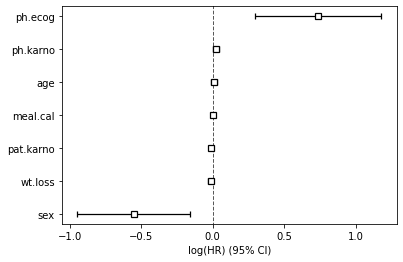

In [8]:
model.plot()

If we see that there is some kind of overlap between our square and this dotted line, then it would basically mean that what we have is not statistically significant.

# Extra Resources
Deep dives:
Time-dependent covariates in the cox proportional-hazards regression model.
Lloyd D. Fisher and D. Y. Lin 1999  
  